In [1]:
#! conda install condaforge::neuraloperator
import neuralop

y_pred =  [13.379 18.765 10.738 15.961 24.654  7.466 30.797 26.646 23.867 22.522
 20.964 17.359 26.956 20.183 20.773 18.734 13.557 17.317 20.655  9.833
 26.544  7.845 11.851 24.99  21.699 11.209  9.12  19.822 25.192 32.332
 13.251 21.76  27.008 16.899 18.71  23.897 17.076 15.041 28.319 33.456
 12.375 18.533 14.504 10.77  17.153 20.501 24.993 15.629 20.102 14.683
  8.611 11.033  7.859 18.631 19.217  9.633 13.99  18.524 32.522  7.707
 21.698 20.375 10.889 24.328 33.75  26.705 25.997 13.209  7.737 28.194
 16.932 25.242 17.647 19.373 15.923 32.15  10.472 19.454 30.668 32.075
 13.175 15.48  16.228 21.847 18.682 13.363 14.543 18.708 22.208 10.951
 32.218 24.553 16.758 24.428 16.021 28.762 28.524 18.978 26.776 21.739
 17.239 26.831 14.127  9.678 11.046 30.06  14.988]
y_test =  [13.8 19.2 11.1 16.2 19.   8.1 30.7 27.4 24.2 22.3 22.2 15.6 28.2 21.5
 20.  18.8 13.8 17.2 19.2 10.8 27.   8.7 12.3 25.1 22.2 11.2  9.5 20.
 25.1 31.8 13.6 21.7 27.4 18.1 17.9 22.9 16.8 15.2 29.1 33.1 13.2 16.3
 15.3 1

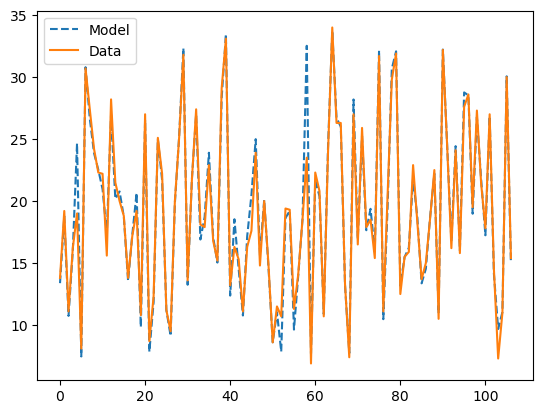

Mean Squared Error: 1.6865315140186947
R-squared: 0.962122145274214

Feature Importances:
            Feature    Importance
1           MaxTemp  9.878306e-01
9       Humidity3pm  3.019259e-03
14          Temp9am  8.524528e-04
10      Pressure9am  7.747129e-04
8       Humidity9am  7.406903e-04
..              ...           ...
40   WindDir9am_NNE  1.422712e-06
64    WindDir3pm_SW  5.752111e-07
33  WindGustDir_WSW  5.109807e-07
68   WindDir3pm_nan  3.553305e-07
34  WindGustDir_nan  1.341376e-07

[69 rows x 2 columns]


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('weather.csv')

# Convert categorical features to numerical
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})

# Identify the categorical columns you want to one-hot encode
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(df[categorical_cols])

# Get the feature names for the new encoded columns
feature_names = encoder.get_feature_names_out(categorical_cols)

# Create a new DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Separate features (X) and target (y)
X = df_encoded.drop(columns = ['Temp3pm'])# all columns except the rain tmr
y = df_encoded['Temp3pm'] # last

# Handle missing values
X = X.dropna()
y = y.loc[X.index] # y only has rows corresponding to row indices of X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('y_pred = ' , y_pred)
print('y_test = ' , y_test.to_numpy())
plt.plot(y_pred, '--', label='Model')
plt.plot(y_test.to_numpy(), label='Data')
plt.legend()
plt.show()

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Get feature importances
importances = model.feature_importances_
# Create a DataFrame to store feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Print the feature importances
print("\nFeature Importances:")
print(feature_importances)

In [4]:
import torch

In [6]:
dir(neuralop.data.datasets.NavierStokesDataset)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'data_processor',
 'test_dbs',
 'train_db']